In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


# Import Data

In [2]:
df = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

 # Explore Data

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

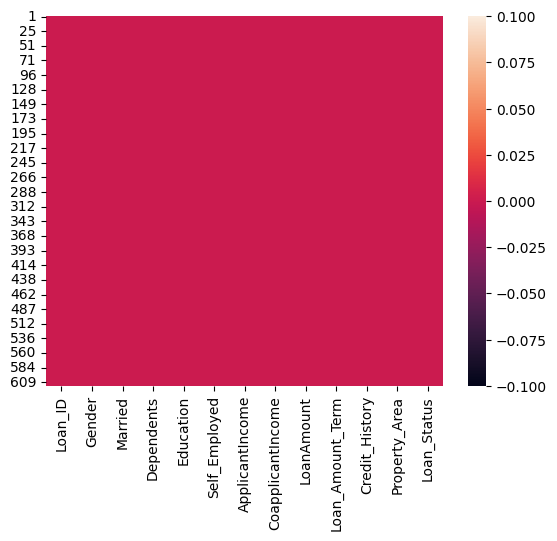

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.Dependents.value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
df.replace(to_replace='3+',value=4,inplace=True)

In [14]:
df.Dependents.value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

# Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

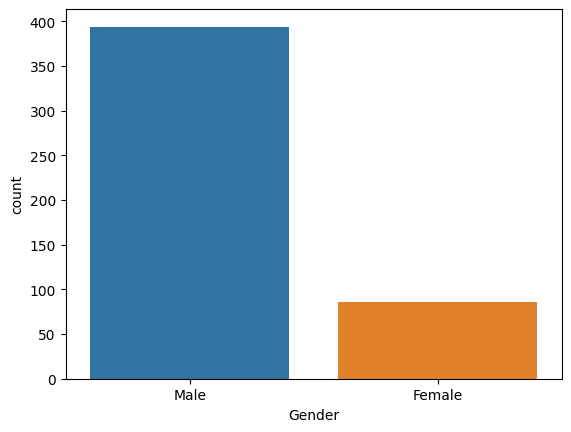

In [15]:
sns.countplot(x='Gender' , data=df)

<Axes: xlabel='Education', ylabel='count'>

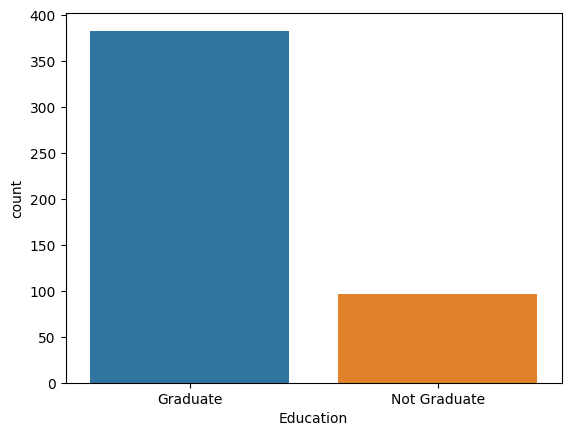

In [16]:
sns.countplot(data=df,x='Education')

Text(0.5, 1.0, 'Loan_Status & Education')

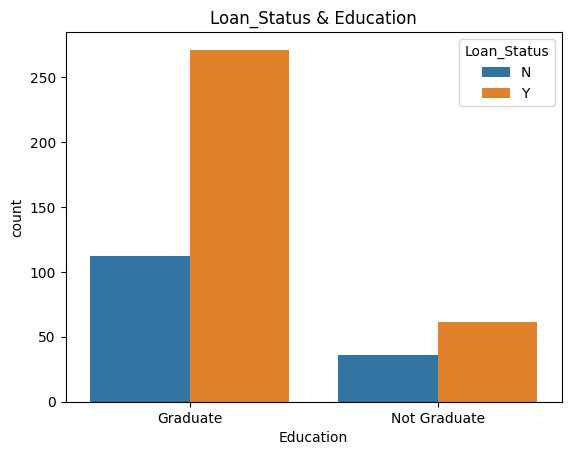

In [17]:
sns.countplot(data=df,x='Education' , hue='Loan_Status')
plt.title('Loan_Status & Education')

# TransForm Data

In [18]:
df=df.replace({'Loan_Status':{'Y':1 , 'N':0}})

In [19]:
df.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0},
                     'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1, 'Urban':2},
                      'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

# Creat Model

In [20]:
x=df.drop(['Loan_Status','Loan_ID'],axis=1)
y=df.Loan_Status

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [22]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train , y_train)

LogisticRegression(max_iter=10000)

In [23]:
y_pred = model.predict(x_test)

In [24]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8541666666666666


In [25]:
model = SVC()
model.fit(x_train , y_train)

SVC()

In [26]:
y_pred = model.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.75


In [28]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred = model.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.6458333333333334


In [31]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred = model.predict(x_test)

In [33]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8125


In [34]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [35]:
y_pred = model.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8125
